# 데이터 전처리

## 개요

1. 결측값 (Missing Value) 처리
    1. 너무 많은 값이 비어있는 변수 또는 레코드는 그 자체를 삭제
    2. 결측값을 다른 값으로 대체하기
        - 평균값(Mean), 중앙값(Median), 최빈치(Mode)
2. 정성적 변수의 정량화
    - 정성적 vs 정량적
        1. 정성적(qualitative) : 수치로 표현하지 못하는 값 Ex) 성별, MBTI, ... 
        2. 정량적(quantative) : 수치로 표현할 수 있는 값 Ex) 몸무게, 나이, ... 
    - 각 속성이 단일 변수값을 갖도록 수정
    - 정성적 변수의 경우, 0/1, 즉 binary code 값으로 변환해야 추후 해석이 가능해짐
3. 이상치(Outlier)의 제거
    - 일정 범위 이외의 잘못 입력된 값으로 추정되는 변수값을 조정함
    - Ex) 상위 10%와 하위 10%에 해당하는 값들을 단일 값으로 부여하는 경우 등
4. 새로운 파생변수 개발
    - 기존 변수를 조합하여 새로운 변수를 개발
5. 정규화(Normalization)
    - 모든 입력 변수의 값이 0~1 사이의 값을 갖도록 조정하거나, 평균 0을 갖는 표준정규분포를 갖도록 값을 조정하는 것
    - 정규화 공식 (Min -Max Normalization) = (x - 최소값) / (최대값 - 최소값)
6. 자료의 구분
    1. 과적합화(Overfitting)의 발생 가능성
    - 과적합화(Overfitting)
        - 기계 학습(machine learning)에서 학습 데이터를 과하게 학습(overfitting)하는 것
        - 학습 정확도는 높은데, 예측 정확도는 낮은 경우
    2. 과적합화(Overfitting)의 예방법
    - 모형 구축시, hold-out data의 개념을 도입함
    - hold-out data (검증)
        - 모형이 일반성을 갖는지 확인하기 위해 남겨두는 unknown data
        - 초기 데이터셋을 별도의 훈련 세트와 테스트 세트로 나누는 방법
    3. 0/1 예측의 경우 0과 1의 비중이 각 데이터셋마다 1:1의 비중이 되어지도록 섞여야함
7. 모형에 들어갈 후보 입력변수 선정
    1. 카이제곱검정 (Chi-square Test)
        - **두 범주형(이산형 - 이산형)** 변수가 서로 상관관계가 있는지 판단하는 통계적 검정방법
        - Ex) 성별과 구매여부 사이에 유의한 관계가 있나?
    2. 독립표본 t검정 (t-Test)
        - **두 집단(2그룹)** 간 **평균치(연속형)**의 차이를 비교하는 통계 검정 방법
        - Ex) 직장인과 백수 사이의 평균 체중이 다른가?
    3. 일원배치분산분석 (ANOVA, ANalysis Of VAriance)
        - **세 집단(3그룹⬆️) 이상의** **평균치(연속형)**의 차이를 비교하는 통계 검정 방법
        - Ex) MBTI와 연봉 간에 유의한 관계가 있나?
    


## [실습] 결측값 처리

In [11]:
# [실습] 결측값 처리
import pandas as pd #데이터셋 관련 라이브러리
import seaborn as sns #시각화 관련 라이브러리
import missingno as msno #결측값 관련 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
titanic = sns.load_dataset("titanic") #데이터셋 불러오기

In [13]:
titanic.head() #상위 5개 행 확인하기
# survived : 생존여부 (0/1)
# alive : 생존여부 (yes/no)

# plclass : 승객 클래스
# fare : 탑승 요금

# sex : 성별 (male/female) 
# who: 성별 (man/woman)
# adult_male : 성인 남성인지 여부

# sibsp : 형재/자매 수
# parch : 부모/자식 수 
# alone : 가족 유무 여부 (True/False)

# embarked : 출발지의 고유 이니셜
# embarked_town : 출발지

# class : 선실의 클래스
# deck : 선실 고유 번호의 가장 앞자리 알파벳 (A~G)



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:>

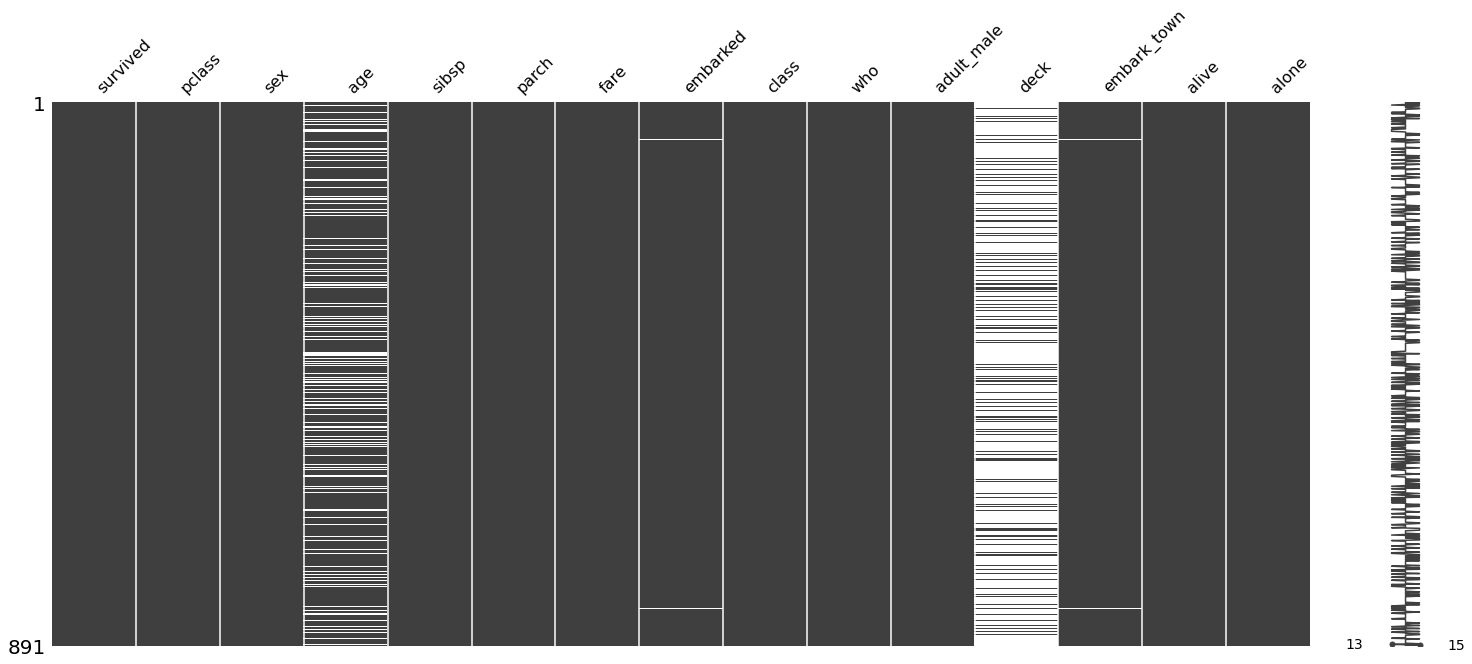

In [14]:
# 결측값 확인 - msno.matrix(데이터셋)
# 스파크라인(spark line) : 각 샘플의 데이터 완성도를 표현함 (흰색 = 결측값)
msno.matrix(titanic)
# age, deck 컬럼에 결측값 ⬆️ , embarked, embark_town 결측값 O

<AxesSubplot:>

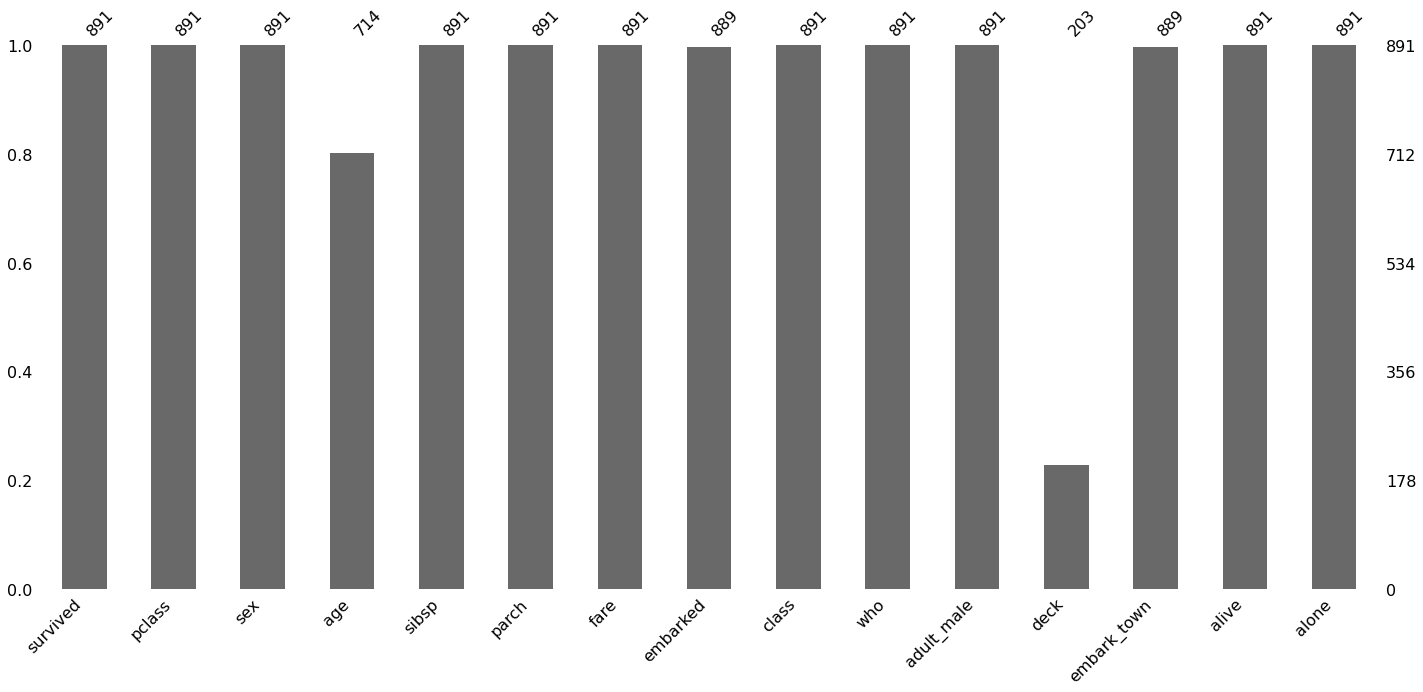

In [15]:
# 결측값 확인 - msno.bar(데이터셋)
# 막대그래프 : 필드별로 결측값이 얼마나 있는지 시각화해줌
msno.bar(titanic)

In [16]:
# 결측값 확인 - 데이터셋.isnull().sum() 
# 수치형 필드들 중에서, 필드별로 결측값 개수를 알려줌
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# 결측값 처리 - 결측값 제거
1. 결측값 제거 - 데이터프레임.dropna()
    * 결측값이 있는 모든 행을 제거
    * `titanic.dropna()`

2. 결측값 제거 - 데이터프레임.dropna(axis=1)
    * 결측값이 있는 모든 컬럼을 제거
    * `titanic.dropna(axis=1)`

3. 결측값 제거 - 데이터프레임.dropna(thresh=일정개수, axis=1)
    * 일정 개수 이하의 결측치 데이터가 있는 컬럼만 남기고 나머지 컬럼 제거
    * `titanic.dropna(thresh=7, axis=1)`

4. 결측값 제거 - 데이터프레임.dropna(thresh=int(len(데이터셋) * 0.5). axis=1)
    * 일정 비율 이하의 결측치 데이터가 있는 컬럼만 남기고 나머지 컬럼 제거

<AxesSubplot:>

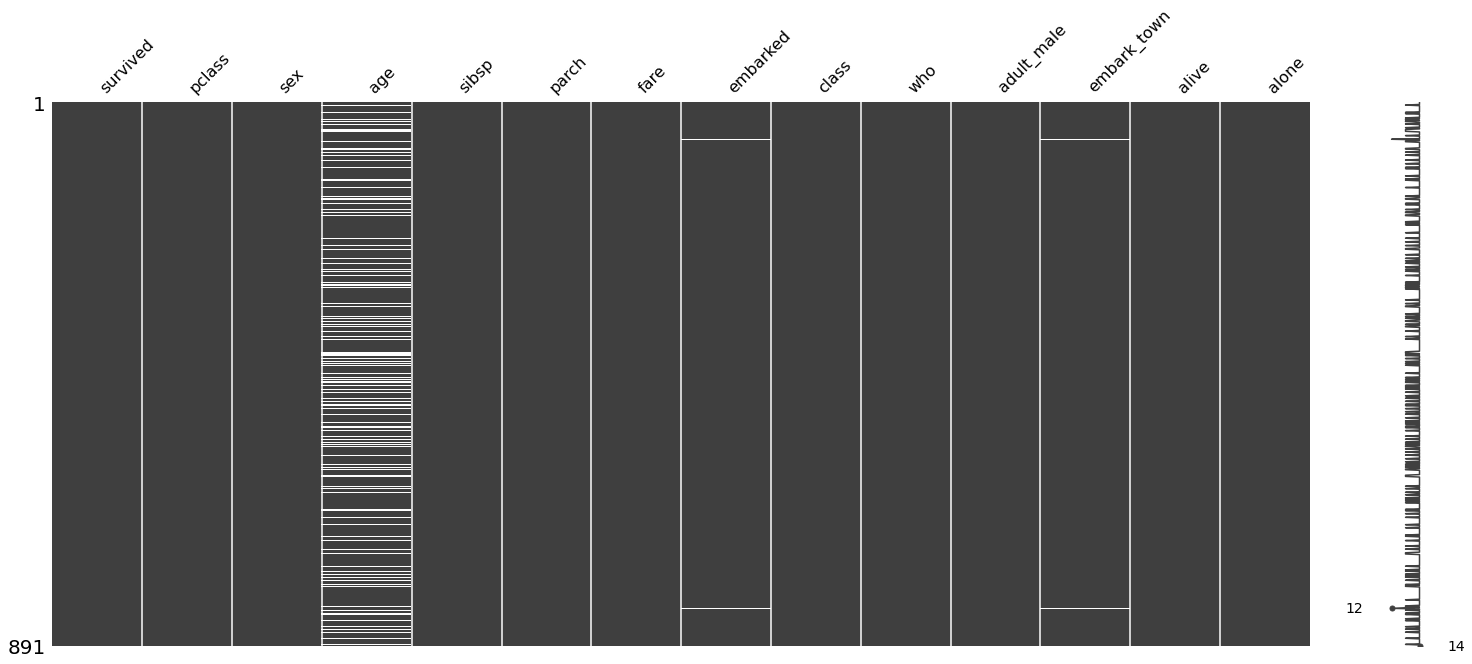

In [17]:
# 결측값이 50% 이상인 필드 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)

# 결측값 처리 - 결측값 대체
1. 결측값 대체 - SimpleImputer(strategy = "원하는 방법")
    - 원하는 방법: 평균값(mean), 중위수(median), 최빈수(most_frequent)
    - 일반적인 적용 방법
        * 실수형 연속값
            * 정규분포 : 평균
            * 비정규분포 : 중위수
        * 카테고리 : 최빈값
    - 코드 예시
        * 
        ```
        from sklearn.impute import SimpleImputer
        imputer = SimpleImputer(strategy="most_frequent")
        df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
        ```

/Users/woodeem/opt/anaconda3/envs/woodeem/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'embark_town')

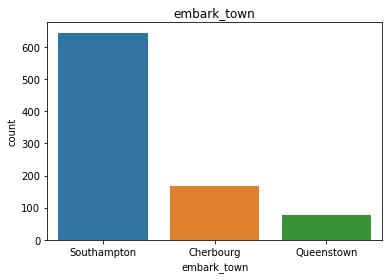

In [18]:
# 출발지 (embark_town) 확인
sns.countplot(titanic.embark_town) #각 카테고리에 속하는 데이터의 개수 카운팅 후, 시각화
plt.title("embark_town") #그래프 이름 지정

<AxesSubplot:>

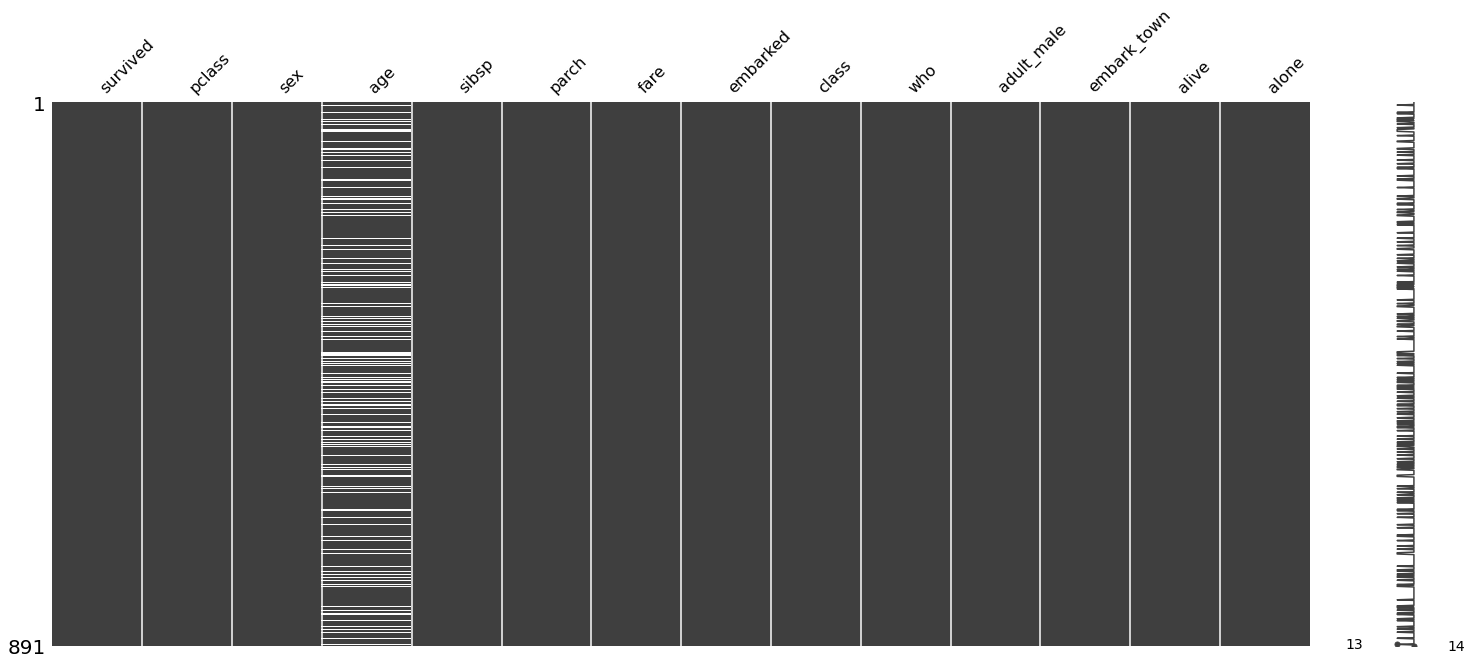

In [19]:
# Embark 필드 카테고리형이므로 최빈수로 결측값 대체하기
from sklearn.impute import SimpleImputer
imputer_embark_town = SimpleImputer(strategy="most_frequent")

# 출발지
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]]) #fit_transform(2차원배열) : 학습 및 훈련

# 출발지의 고유 이니셜
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic) #결측치 그래프 확인

Text(0.5, 1.0, 'age')

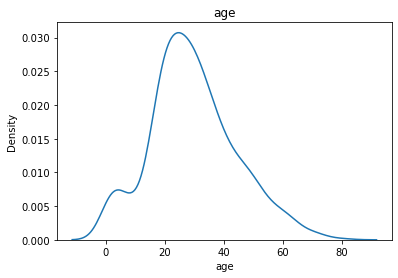

In [20]:
# age 분포 확인하기 : 비대칭(비정규분포)
sns.kdeplot(titanic.age) 
plt.title("age")

<AxesSubplot:>

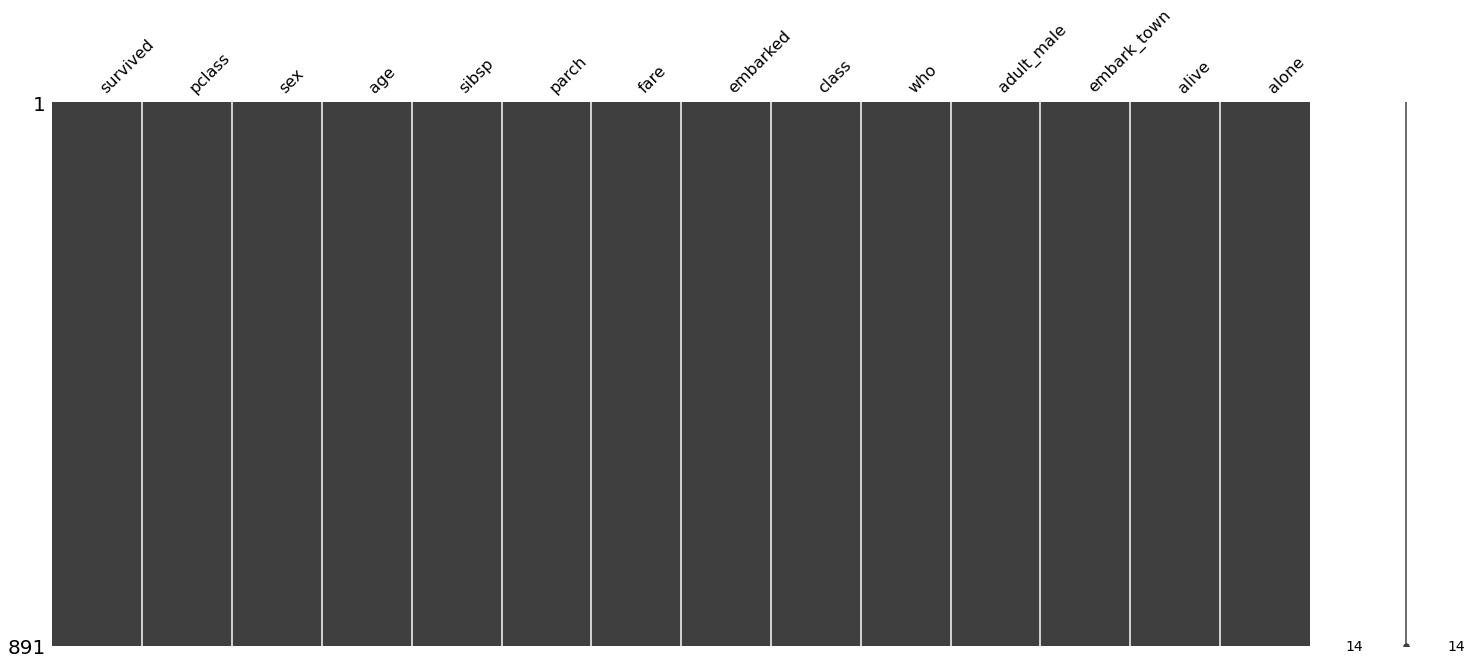

In [21]:
#비대칭의 경우 중위수를 사용함
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_age.fit_transform(titanic[["age"]])

msno.matrix(titanic)

# 스케일링
- 개념 : 데이터 전처리 과정 중 하나로, 모든 데이터의 범위(또는 분포)를 같게 만들어주는 작업
- 이유 : 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0 으로 수렴하거나 무한으로 발산해버릴 수 있음
- 주로 사용되는 스케일링 개념
    1. Standardization (표준화)
        * 데이터의 **평균을 0, 분산을 1** 로 스케일링하여 **정규분포**로 만들어줌
    2. Normalization (정규화)
        * 최소값을 0, 최대값은 1 로 변환되므로, 모든 특성들은 **[0, 1] 범위**를 갖게됩니다.
- sklearn의 스케일러
- 컬럼 단위 스케일링 : 각 특성(열)의 통계치를 이용하여 진행
    1. StandardScaler()
        - 개념
            * **평균을 0, 분산을 1**로 스케일링, 즉 표준화를 시켜 정규분포로 만들어줌
            * (x - mean(x)) / stdev(x) # (특정값 - 평균) / 표준편차
        - 장점
            * 데이터의 최대값, 최소값을 모를 때 사용할 수 있음
            * 평균에서 몇 표준편차만큼 떨어져있는지 기준
        - 단점 : 최대 & 최소 값의 크기 제한이 없기 때문에 **이상치에 민감**
        - 특징 : 데이터의 특징을 모르는 경우 가장 무난한 종류
    2. MinMaxScaler()
        - 개념
            * MinMax Normalization으로도 불리며, 가장 작은 값을 0, 큰값은 1로 변환
            * (x - min(x)) / (max(x) - min(x)) #원래 값에서 피처의 최솟값을 뺀 값을 피처의 최댓값과 최솟값의 차이로 나누어 정규화
            * 사이킷런에서 제공하는 MinMaxScaler는 음수 값이 없으면 **0에서 1**, 음수값이 있으면 **-1에서 1**의 값으로 변환
        - 장점 : 각 feature의 범위가 모두 0~1로 동등하게 분포를 바꿀 수 있다는 장점
        - 단점 : 이상치에 민감
        - 특징 : 회귀에 유용함
    3. RobustScaler()
    - 개념
        * 평균과 분산 대신에 **중앙 값**을 0, **사분위 값(IQR)**을 1이 되도록 스케일링하여, 이상치가 있어도 대부분의 데이터를 0 주위로 모이게 함
        * feature의 median(Q2)에 해당하는 데이터를 0으로 잡고, Q1, Q3 사분위수와의 IQR 차이 만큼을 기준으로 정규화를 진행함
        * (x - Q2) / (Q3 - Q1) # (x - median) / IQR
    - 장점 
        * **이상치 영향을 최소화** 할 수 있기 때문에, 이상치가 많은 데이터를 다루는 경우 사용
        * 미리 정해진 간격에 의해 데이터를 변형시키지는 않음
    4. MaxAbsScaler()
        - 개념
            * 각 특성의 절대값이 0 과 1 사이가 되도록 스케일링합니다.
            * **데이터가 [-1, 1] 범위**로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 같습니다.
            * x / | max(x) |
        - 장점 : 데이터를 이동 / 중심화하지 않으므로 **희소성을 파괴하지 않음**
        - 단점 : **이상치에 매우 민감**
- 행 단위 스케일링 : 각 샘플(행)마다 적용
    5. Normalizer()
    - 개념
        * 한 행의 모든 특성(컬럼)들 사이의 **유클리드 거리(L2 norm)가 1**이 되도록 스케일링
        * L2 normalization 이라는 기법이 모든 데이터값에 적용되어, 행의 모든 값이 단위 노름(unit norm)
        * 단위 노름(unit norm)을 가진 L2는 각 값들이 제곱화되고 합해지면 총합이 1이 된다는 의미
        * ![img](https://miro.medium.com/max/1400/1*ROf24Gp4RWirc3RRz5jMsA.png)
        * 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라, **모델(특히나 딥러닝) 내 학습 벡터에 적용**하며,피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않음




In [22]:
from patsy import demo_data
# 임의의 실수형 데이터 생성
df = pd.DataFrame(demo_data("x1","x2","x3","x4","x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [23]:
import numpy as np
X = np.arange(7).reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [24]:
from sklearn.preprocessing import StandardScaler
# 평균 0, 표준편차 1이 되도록 스케일링
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [25]:
# 이상치(outlier)가 존재할 경우
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [26]:
scaler.fit_transform(X2) #0에 수렴하지 않고 멀어짐

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [27]:
# 이상치 많으면 RobustScaler
# 중앙값 0, IQR이 1이 되도록 변환 아웃라이어가 있어도 대부분의 데이터가 0 주위로 모이게 됨
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X2) # e뒤의 숫자는 바로 10의 몇 제곱인지를 나타내는 지수

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

# 범주형 데이터의 전처리
## 범주형 데이터 & 수치형 데이터
- 수치형 데이터
    - 개념 : 관측값이 수치로 측정되는 자료
    - **연속형 자료**와 **이산형 자료**로 구분됨
        - 연속형 자료(continuous data) : 키, 몸무게와 같이 연속적인 자료 (measure)
        - 이산형 자료(discrete data) : 자동차 사고 건수와 같이 셀 수 있는 자료 (count)
- 범주형 데이터
    - 개념 : 성별, 혈액형, 주소, 반 등 종류를 표시하는 데이터 (카테고리 데이터)
## 범주형 데이터의 전처리
- 데이터 분석 모형은 숫자만 입력으로 받을 수 있기 때문에 범주형 데이터는 숫자로 변환해야 함
- 방법 2가지 : 더미변수화, 카테고리 임베딩
    - **더미변수화**
        * 더미변수(dummy variable) : 0 또는 1만 가지는 값으로, **어떤 특징의 존재 여부**를 표시함 -> 각 더미변수는 **특정한 하나의 카테고리값인가 아닌가**를 나타내는 지시자(indicator)
        * 1 부터 𝐾까지의 값을 가질 수 있는 범주형값은 𝐾개의 더미변수 벡터로 표시
        * Ex) 직장인인지 표시하는 d1 기준 | 직장인 -> d1 = 1, d2 = 0, 취준생 -> d1 = 0, d2 = 1
    - **카테고리 임베딩(embedding)**
        * 범주값 대신 범주값의 특성을 나타내는 연속값 또는 연속값 벡터를 사용
        * Ex) 직장인 이름을 나타내는 범주값의 경우 -> 연봉, 나이, 경력년도 등
        * 단점 : 데이터 분석 목적에 맞게 대체할 특징을 선택해야하고, 추가 데이터를 조사해야한다는 부담


In [30]:
import pandas as pd
# 데이터프레임 생성
worker_df1 = pd.DataFrame(["Employed", "Unemployeed"], columns=["work"])
# 직장인 여부 판별하는 더미변수
worker_df2 = pd.get_dummies(worker_df1["work"], prefix="workOX")
print(worker_df1)
print("------------⬇️-----------")
print(worker_df2)

          work
0     Employed
1  Unemployeed
------------⬇️-----------
   workOX_Employed  workOX_Unemployeed
0                1                   0
1                0                   1
